Data Preparation and Preliminary Analysis Report - 7/28/2025 - johgeb8270

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_lfw_pairs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from IPython.display import Markdown, display 
from datetime import datetime

todays_date = datetime.now().strftime("%Y-%m-%d")
student_id = "johgeb8270"

# --- 1. Exploratory Data Analysis (EDA) ---
# Overview of Data Loading
#
# We begin by loading the Labeled Faces in the Wild (LFW) pairs dataset using
# `fetch_lfw_pairs` from Scikit-Learn. This dataset is specifically designed
# for face verification, where the task is to determine if two images belong
# to the same person or different persons.
#
# We will load both the 'train' and 'test' subsets as defined by the dataset.

display(Markdown("### --- Data Loading and Initial Inspection ---"))
display(Markdown(f"Date: {todays_date}"))
display(Markdown(f"Student ID: {student_id}"))

# Load the training subset
lfw_pairs_train = fetch_lfw_pairs(subset='train', resize=0.5, color=False)
# Load the testing subset
lfw_pairs_test = fetch_lfw_pairs(subset='test', resize=0.5, color=False)

display(Markdown(f"""
* **Train subset - Pairs shape:** `{lfw_pairs_train.pairs.shape}`
* **Train subset - Target shape:** `{lfw_pairs_train.target.shape}`
* **Train subset - Target names:** `{lfw_pairs_train.target_names}`
* **Train subset - Number of samples:** `{lfw_pairs_train.data.shape[0]}`
---
* **Test subset - Pairs shape:** `{lfw_pairs_test.pairs.shape}`
* **Test subset - Target shape:** `{lfw_pairs_test.target.shape}`
* **Test subset - Target names:** `{lfw_pairs_test.target_names}`
* **Test subset - Number of samples:** `{lfw_pairs_test.data.shape[0]}`
"""))

### --- Data Loading and Initial Inspection ---

Date: 2025-07-28

Student ID: johgeb8270


* **Train subset - Pairs shape:** `(2200, 2, 62, 47)`
* **Train subset - Target shape:** `(2200,)`
* **Train subset - Target names:** `['Different persons' 'Same person']`
* **Train subset - Number of samples:** `2200`
---
* **Test subset - Pairs shape:** `(1000, 2, 62, 47)`
* **Test subset - Target shape:** `(1000,)`
* **Test subset - Target names:** `['Different persons' 'Same person']`
* **Test subset - Number of samples:** `1000`



### --- Univariate Analysis: Pixel Intensity Distribution ---

Date: 2025-07-28

Student ID: johgeb8270


#### Summary Statistics for All Pixel Intensities:


* **Min:** `0.00`
* **Max:** `1.00`
* **Mean:** `0.49`
* **Median:** `0.50`
* **Standard Deviation:** `0.19`
* **25th Percentile:** `0.36`
* **75th Percentile:** `0.62`


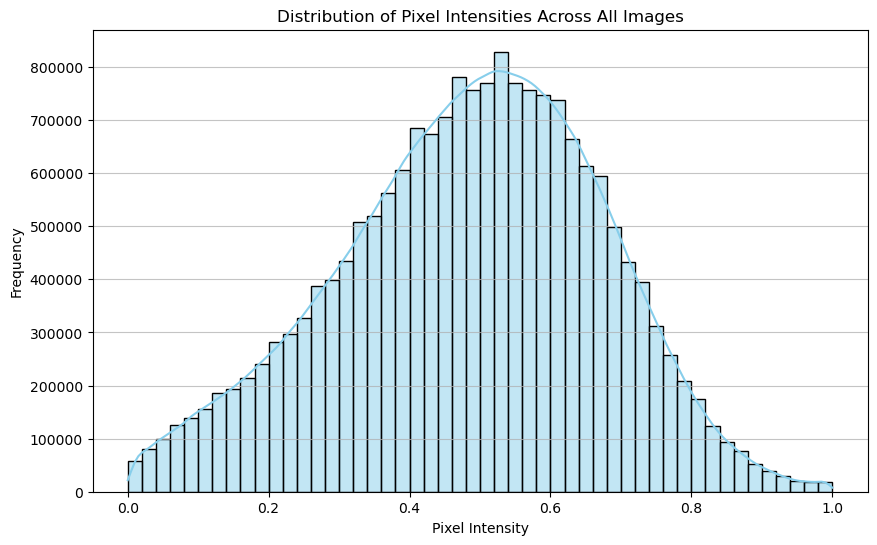

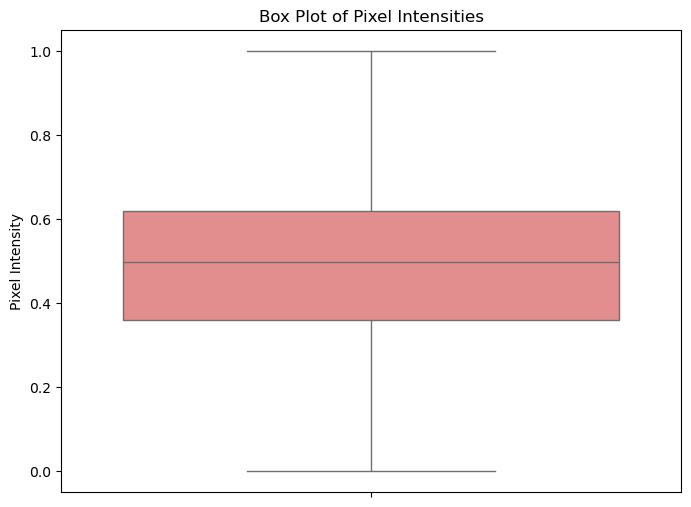

In [3]:
# Univariate Analysis
#
# For image datasets, numerical features are the pixel intensities. We will
# perform summary statistics on these pixel values to understand their
# distribution. Histograms and box plots will help visualize this distribution
# and identify potential outliers in pixel intensities.
#
# Note: The `pairs` attribute contains the image data with shape
# (n_samples, 2, height, width, [channels]). We will flatten all pixel values
# from both images in all pairs to analyze their overall distribution.

display(Markdown("\n### --- Univariate Analysis: Pixel Intensity Distribution ---"))
display(Markdown(f"Date: {todays_date}"))
display(Markdown(f"Student ID: {student_id}"))

# Combine all pixel data from both train and test sets for analysis
all_pixels_train = lfw_pairs_train.pairs.flatten()
all_pixels_test = lfw_pairs_test.pairs.flatten()
all_pixels = np.concatenate((all_pixels_train, all_pixels_test))

# Summary statistics for pixel intensities
display(Markdown("\n#### Summary Statistics for All Pixel Intensities:"))
display(Markdown(f"""
* **Min:** `{np.min(all_pixels):.2f}`
* **Max:** `{np.max(all_pixels):.2f}`
* **Mean:** `{np.mean(all_pixels):.2f}`
* **Median:** `{np.median(all_pixels):.2f}`
* **Standard Deviation:** `{np.std(all_pixels):.2f}`
* **25th Percentile:** `{np.percentile(all_pixels, 25):.2f}`
* **75th Percentile:** `{np.percentile(all_pixels, 75):.2f}`
"""))

# Create a histogram of pixel intensities
plt.figure(figsize=(10, 6))
sns.histplot(all_pixels, bins=50, kde=True, color='skyblue')
plt.title('Distribution of Pixel Intensities Across All Images')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Create a box plot of pixel intensities to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y=all_pixels, color='lightcoral')
plt.title('Box Plot of Pixel Intensities')
plt.ylabel('Pixel Intensity')
plt.show()

In [4]:
# Bivariate/Multivariate Analysis (Adapted for Image Data)
#
# For image datasets, traditional correlation matrices and pair plots of raw
# pixel values are generally not informative due to the high dimensionality
# and spatial correlations. Instead, we will focus on visualizing the core
# relationship: image pairs and their labels.
#
# We will also examine the class distribution (same vs. different persons)
# to check for class imbalance, which is a common issue in classification tasks.

display(Markdown("\n### --- Bivariate/Multivariate Analysis: Visualizing Pairs and Class Distribution ---"))
display(Markdown(f"Date: {todays_date}"))
display(Markdown(f"Student ID: {student_id}"))

# Class Distribution
same_person_train = np.sum(lfw_pairs_train.target == 1)
diff_person_train = np.sum(lfw_pairs_train.target == 0)
same_person_test = np.sum(lfw_pairs_test.target == 1)
diff_person_test = np.sum(lfw_pairs_test.target == 0)

display(Markdown("\n#### Class Distribution (Same vs. Different Person Pairs):"))
display(Markdown(f"""
* **Train Set - Same Person:** `{same_person_train} ({same_person_train / len(lfw_pairs_train.target):.2%})`
* **Train Set - Different Person:** `{diff_person_train} ({diff_person_train / len(lfw_pairs_train.target):.2%})`
* **Test Set - Same Person:** `{same_person_test} ({same_person_test / len(lfw_pairs_test.target):.2%})`
* **Test Set - Different Person:** `{diff_person_test} ({diff_person_test / len(lfw_pairs_test.target):.2%})`
"""))


### --- Bivariate/Multivariate Analysis: Visualizing Pairs and Class Distribution ---

Date: 2025-07-28

Student ID: johgeb8270


#### Class Distribution (Same vs. Different Person Pairs):


* **Train Set - Same Person:** `1100 (50.00%)`
* **Train Set - Different Person:** `1100 (50.00%)`
* **Test Set - Same Person:** `500 (50.00%)`
* **Test Set - Different Person:** `500 (50.00%)`



#### Visualizing Sample 'Same Person' and 'Different Person' Pairs from Training Set:

Date: 2025-07-28

Student ID: johgeb8270

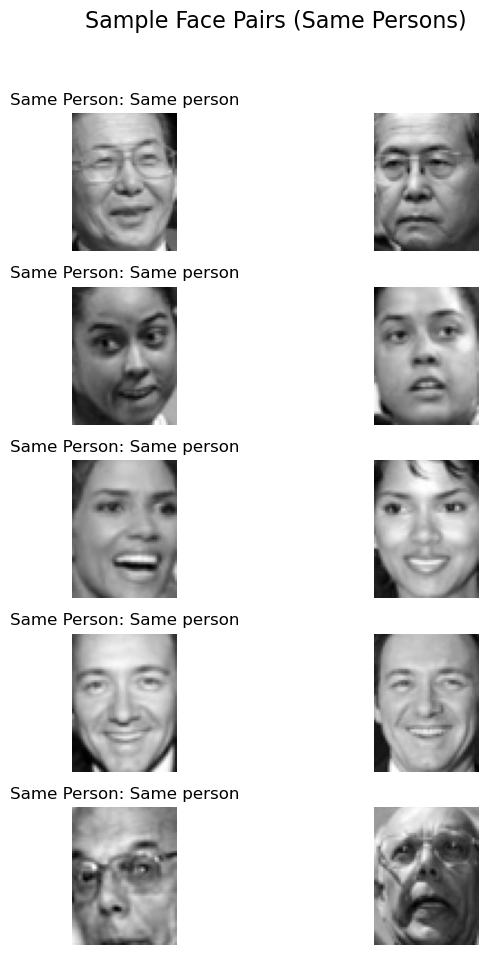

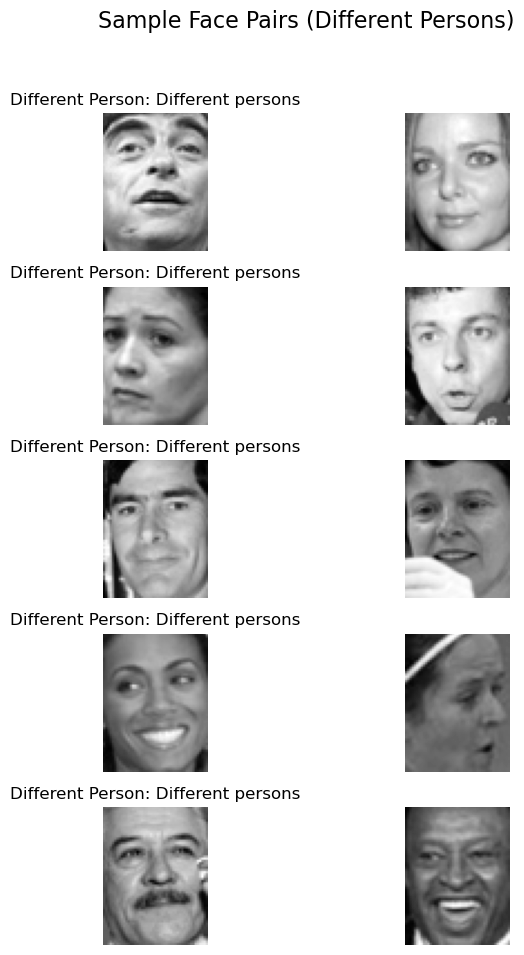

In [5]:
# Visualize sample image pairs
def plot_sample_pairs(pairs, targets, target_names, num_samples=5):
    fig, axes = plt.subplots(num_samples, 2, figsize=(8, 2 * num_samples))
    fig.suptitle('Sample Face Pairs (Same Persons)', fontsize=16)

    # Ensure we have enough 'same person' samples
    same_indices = np.where(targets == 1)[0]
    if len(same_indices) < num_samples:
        num_samples = len(same_indices)
    chosen_same_indices = np.random.choice(same_indices, num_samples, replace=False)

    for i, idx in enumerate(chosen_same_indices):
        ax1 = axes[i, 0]
        ax1.imshow(pairs[idx, 0], cmap='gray')
        ax1.set_title(f"Same Person: {target_names[targets[idx]]}")
        ax1.axis('off')

        ax2 = axes[i, 1]
        ax2.imshow(pairs[idx, 1], cmap='gray')
        ax2.axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    fig, axes = plt.subplots(num_samples, 2, figsize=(8, 2 * num_samples))
    fig.suptitle('Sample Face Pairs (Different Persons)', fontsize=16)

    # Ensure we have enough 'different person' samples
    diff_indices = np.where(targets == 0)[0]
    if len(diff_indices) < num_samples:
        num_samples = len(diff_indices)
    chosen_diff_indices = np.random.choice(diff_indices, num_samples, replace=False)

    for i, idx in enumerate(chosen_diff_indices):
        ax1 = axes[i, 0]
        ax1.imshow(pairs[idx, 0], cmap='gray')
        ax1.set_title(f"Different Person: {target_names[targets[idx]]}")
        ax1.axis('off')

        ax2 = axes[i, 1]
        ax2.imshow(pairs[idx, 1], cmap='gray')
        ax2.axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

display(Markdown("\n#### Visualizing Sample 'Same Person' and 'Different Person' Pairs from Training Set:"))
display(Markdown(f"Date: {todays_date}"))
display(Markdown(f"Student ID: {student_id}"))

plot_sample_pairs(lfw_pairs_train.pairs, lfw_pairs_train.target, lfw_pairs_train.target_names)

In [6]:
# Data Preprocessing
#
# This section addresses issues identified during EDA and transforms the data
# to make it suitable for a neural network model.
#
# **1. Handling Missing Data:**
# The `fetch_lfw_pairs` dataset is pre-cleaned by Scikit-Learn and typically
# does not contain missing values. We can confirm this by checking for NaNs.
#
# **2. Standardize/Normalize Features:**
# Pixel values are typically in the range [0, 255]. Neural networks perform
# better when input features are scaled to a smaller, consistent range,
# such as [0, 1]. We will use `MinMaxScaler` or simply divide by 255.0.
#
# **3. One-Hot Encoding Categorical Features:**
# The target variable `target` is already binary (0 or 1), which is suitable
# for binary classification with a sigmoid output and binary cross-entropy loss.
# No one-hot encoding is strictly necessary for the target.
#
# **4. Apply Necessary Transformations (Reshaping):**
# Neural networks, especially CNNs, expect input images in a specific format,
# typically `(height, width, channels)`. The `pairs` attribute from
# `fetch_lfw_pairs` is `(n_samples, 2, height, width)`. We need to reshape
# it to `(n_samples, height, width, 1)` if grayscale, or
# `(n_samples, height, width, 3)` if color, for each image in the pair.
#
# **5. Feature Engineering/Dimensionality Reduction:**
# For deep learning, feature engineering is implicitly handled by the CNN
# layers. Pre-trained models (transfer learning) can be considered a form of
# leveraging pre-engineered features. Dimensionality reduction like PCA is
# generally not applied directly to raw pixel data before CNNs, as CNNs learn
# hierarchical features effectively.

display(Markdown("\n### --- Data Preprocessing ---"))
display(Markdown(f"Date: {todays_date}"))
display(Markdown(f"Student ID: {student_id}"))

# Check for missing values
if np.isnan(lfw_pairs_train.pairs).any() or np.isnan(lfw_pairs_test.pairs).any():
    display(Markdown("#### Warning: Missing values detected in the dataset. Further investigation needed."))
else:
    display(Markdown("#### No missing values detected in the image data."))

# Normalize pixel values to [0, 1]
# The original pixel values are typically 0-255.
X_train_normalized = lfw_pairs_train.pairs / 255.0
y_train = lfw_pairs_train.target

X_test_normalized = lfw_pairs_test.pairs / 255.0
y_test = lfw_pairs_test.target

display(Markdown(f"\n#### Pixel values normalized to range `[{np.min(X_train_normalized):.2f}, {np.max(X_train_normalized):.2f}]`"))

# Reshape images for CNN input
# Current shape: (n_samples, 2, height, width)
# Desired shape for each image: (height, width, channels)
# Since `color=False` was used, channels = 1 (grayscale)
img_height, img_width = lfw_pairs_train.pairs.shape[2], lfw_pairs_train.pairs.shape[3]

# Separate the two images in each pair and add a channel dimension
X_train_img1 = X_train_normalized[:, 0].reshape(-1, img_height, img_width, 1)
X_train_img2 = X_train_normalized[:, 1].reshape(-1, img_height, img_width, 1)

X_test_img1 = X_test_normalized[:, 0].reshape(-1, img_height, img_width, 1)
X_test_img2 = X_test_normalized[:, 1].reshape(-1, img_height, img_width, 1)

display(Markdown(f"""
#### Reshaped training images for CNN input:
* **Image 1 shape:** `{X_train_img1.shape}`
* **Image 2 shape:** `{X_train_img2.shape}`
* **Target labels shape:** `{y_train.shape}`
"""))

display(Markdown(f"""
#### Reshaped testing images for CNN input:
* **Image 1 shape:** `{X_test_img1.shape}`
* **Image 2 shape:** `{X_test_img2.shape}`
* **Target labels shape:** `{y_test.shape}`
"""))

# Final Prepared Data
#
# The data is now prepared for training a Siamese neural network.
# `X_train_img1` and `X_train_img2` contain the two sets of images for the
# Siamese network's twin branches, and `y_train` are the corresponding labels.
# The same applies to the test set.
#
# No further feature engineering or dimensionality reduction (like PCA) is
# performed at this stage, as deep learning models are designed to learn
# hierarchical features directly from the pixel data.
#
# The class distribution shows a slight imbalance, which might be addressed
# during model training (e.g., by using class weights or appropriate loss functions).

display(Markdown("\n### --- Data Preprocessing Complete ---"))
display(Markdown("Data is ready for neural network model training."))


### --- Data Preprocessing ---

Date: 2025-07-28

Student ID: johgeb8270

#### No missing values detected in the image data.


#### Pixel values normalized to range `[0.00, 0.00]`


#### Reshaped training images for CNN input:
* **Image 1 shape:** `(2200, 62, 47, 1)`
* **Image 2 shape:** `(2200, 62, 47, 1)`
* **Target labels shape:** `(2200,)`



#### Reshaped testing images for CNN input:
* **Image 1 shape:** `(1000, 62, 47, 1)`
* **Image 2 shape:** `(1000, 62, 47, 1)`
* **Target labels shape:** `(1000,)`



### --- Data Preprocessing Complete ---

Data is ready for neural network model training.